# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [2]:
# Part 1
import numpy as np
# Fill in the answer to part 1 below
P = np.matrix([[0.3, 0.4, 0.3],
               [0.2, 0.5, 0.3],
               [0.4,0.3,0.3]])
p_start = [0,1,0]

problem1_p1 = p_start * P**2
print(problem1_p1)

[[0.28 0.42 0.3 ]]


In [4]:
# Part 2
p_suburbs = 0.28

# Fill in the answer to part 2 below
problem1_p2 = 0.28 -(0.3*0.2)
print(problem1_p2)

0.22000000000000003


In [ ]:
# Part 3

# Fill in the answer to part 3 below as a boolean
# Yes since you can reach any state from any other state
problem1_irreducible = True



## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [ ]:
# Part 4
P_T = P.T

eigvals, eigvecs = np.linalg.eig(P_T)

stationary_vector = np.real(eigvecs[:, np.isclose(eigvals, 1)])

stationary_distribution = stationary_vector / stationary_vector.sum()
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = stationary_distribution

In [5]:
# Part 5
hitting_times = []

#h_0->1
#need to account for the time period we have now,

# h_0->1 = 1 + 0.3P* h_0-1 + 0.3* h_2->1
# h_2->1 = 1 + 0.4 * h_0->1 + 0.3 * h_2->1

# (1-0.3) * h_0->1 - P02*h21 = 1
# 0.7 * h_0->1 - 0.3 * h_2->1 = 1
# 1- P22) * h_2->1 - P20 * h_0->1 = 1
# 1-0.3 * h_2->1 - 0.4 * h_0->1 = 1



A = np.array([[0.7,-0.3],[-0.4,0.7]])

b = np.array([1,1])

hitting_times = np.linalg.solve(A,b)

h_0_to_1 = hitting_times[0]
h_2_to_1 = hitting_times[1]

print(f"Expected hitting time from downtown to suburbs: {h_0_to_1:.4f} steps")
print(f"Expected hitting time from countryside to suburbs: {h_2_to_1:.4f} steps")
# Fill in the answer to part 5 below
# That is, the expected number of steps
problem1_ET = None

Expected hitting time from downtown to suburbs: 2.7027 steps
Expected hitting time from countryside to suburbs: 2.9730 steps



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [25]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
import pandas as pd

problem2_df = pd.read_csv("data/abalone.csv")
print(problem2_df['Sex'].head())
problem2_df['Sex'] = problem2_df['Sex'].map({'M': 0, 'F': 1, 'I': 2})
print(problem2_df['Sex'].head())


0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object
0    0
1    0
2    1
3    0
4    2
Name: Sex, dtype: int64


In [26]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = problem2_df.columns.tolist()[:-1]
print(problem2_features)

# Fill in the target as a string with the correct column name

problem2_target = problem2_df.columns.tolist()[-1]
print(problem2_target)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
Rings


In [27]:
# Part 2
from sklearn.model_selection import train_test_split
X = problem2_df[problem2_features]
Y = problem2_df[problem2_target]
print(Y.head())
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64


In [28]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LinearRegression


# Initialize your linear regression model

problem2_model = LinearRegression()

problem2_model.fit(problem2_X_train,problem2_y_train)


# Train your model on the training data


LinearRegression()

In [29]:
# Part 4

# Evaluate the model by computing the mean absolute error
from sklearn.metrics import mean_absolute_error
pred = problem2_model.predict(problem2_X_test)

problem2_mae = mean_absolute_error(problem2_y_test,pred)

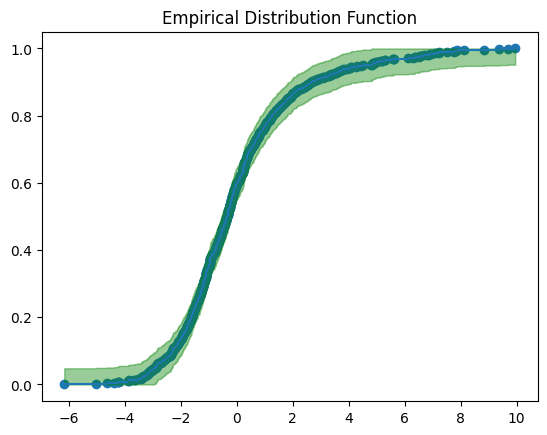

In [30]:
# Part 4
from Utils import makeEDF,plotEDF

residuals = problem2_y_test - pred

edf = makeEDF(residuals)
plotEDF(edf, confidence_band=True, alpha=0.95)
# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

# from Utils import makeEDF,plotEDF


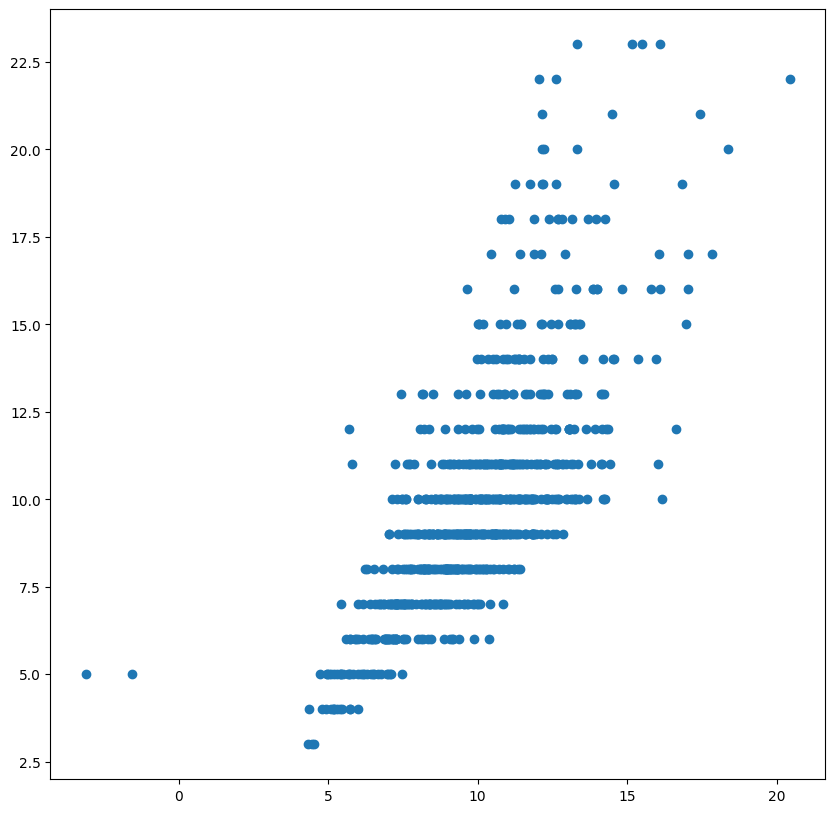

In [31]:
# Part 5
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(pred,problem2_y_test)

# Write the code below to produce the scatter plot for part 5



## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MAE

#### Discussion on the predicted vs. true scatterplot

#### Discussion


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [64]:
# Part 1
df = pd.read_csv("data/visits_clean.csv", delimiter=" ")
print(df.columns)

# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = df

Index(['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'exclhlth', 'poorhlth',
       'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'male',
       'married', 'school', 'faminc', 'employed', 'privins', 'medicaid'],
      dtype='object')


In [101]:
# Part 1

# Fill in the features as a list of strings of the names of the columns
features = problem3_df.columns.tolist()[1:]
print(features)
features_remove = ['opp','epnp', 'faminc']
problem3_features = [x for x in features if x not in features_remove]
print(problem3_features)


# Fill in the target as a string with the correct column name

problem3_target = problem3_df.columns.tolist()[0]


['ofnp', 'opp', 'opnp', 'emr', 'hosp', 'exclhlth', 'poorhlth', 'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'male', 'married', 'school', 'faminc', 'employed', 'privins', 'medicaid']
['ofnp', 'opnp', 'emr', 'hosp', 'exclhlth', 'poorhlth', 'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'male', 'married', 'school', 'employed', 'privins', 'medicaid']



## Part 1

Double click this cell to enter edit mode and write your answer for part 1 below this line.

#### What features are reasonable?

#### In regards to how much data we have, how many features do you think we should aim for?

#### What other features would you like to have used but was not collected?

#### Discussion


In [133]:
# Part 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Fill in your X and y below
problem3_X = problem3_df[problem3_features]
problem3_y = problem3_df[problem3_target]


# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(problem3_X, problem3_y, train_size=0.8, random_state=42)


scaler = MinMaxScaler()
problem3_X_train_scaler = scaler.fit_transform(problem3_X_train)
problem3_X_test_scaler = scaler.transform(problem3_X_test)



problem3_X_train_df = pd.DataFrame(problem3_X_train_scaler, columns=problem3_X_train.columns, index=problem3_X_train.index)
problem3_X_test_df = pd.DataFrame(problem3_X_test_scaler, columns=problem3_X_test.columns, index=problem3_X_test.index)

print(problem3_X_train_df)





          ofnp      opnp       emr   hosp  exclhlth  poorhlth  numchron  \
4335  0.000000  0.000000  0.250000  0.125       0.0       1.0     0.625   
3052  0.000000  0.000000  0.000000  0.000       1.0       0.0     0.375   
3527  0.038462  0.000000  0.000000  0.000       0.0       0.0     0.125   
1448  0.000000  0.000000  0.000000  0.000       0.0       0.0     0.250   
1749  0.000000  0.000000  0.000000  0.000       0.0       0.0     0.250   
...        ...       ...       ...    ...       ...       ...       ...   
3444  0.000000  0.000000  0.083333  0.125       0.0       0.0     0.125   
466   0.000000  0.026549  0.000000  0.000       0.0       0.0     0.250   
3092  0.012821  0.000000  0.000000  0.000       0.0       0.0     0.250   
3772  0.038462  0.008850  0.000000  0.500       0.0       1.0     0.375   
860   0.012821  0.008850  0.000000  0.000       0.0       0.0     0.125   

      adldiff  noreast  midwest  west       age  male  married    school  \
4335      1.0      0.0 

In [143]:
# Part 3

# Fill in the function loss below

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        # define the objective/cost/loss function we want to minimise
        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values 
            # of the coefficients, here coeff[:-1] represent alpha 
            # and coeff[-1] represent beta
            lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])

            # use the Y variable that is available here to define 
            # the loss function, return the value of the loss for 
            # this Y and for this parameter lam defined above
       
            regularization_term = 0.01 * np.sum(np.square(coeffs[:-1]))
            loss = -np.sum(Y * np.log(lam) - lam) + regularization_term
            
            return loss
            #return np.mean(lam - (Y * np.log(lam)))

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below

        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments,method='cg', options={'disp': True})
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])

In [142]:
# Part 4

# Initialize your PoissonRegression model
problem3_model = PoissonRegression()



# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train_df,problem3_y_train)

# This is to make sure that everything went well, 
# check that success is True
print(problem3_model.result)

         Current function value: -16903.556299
         Iterations: 189
         Function evaluations: 6960
         Gradient evaluations: 348
 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: -16903.556299406337
       x: [ 1.883e+00  1.609e+00 ...  2.453e-01  9.359e-01]
     nit: 189
     jac: [ 0.000e+00  2.441e-04 ...  0.000e+00 -2.441e-04]
    nfev: 6960
    njev: 348


/usr/local/lib/python3.11/site-packages/scipy/optimize/_minimize.py:706: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


In [139]:
# Part 5
from sklearn.metrics import mean_squared_error

y_pred = problem3_model.predict(problem3_X_test)
problem3_mse = mean_squared_error(problem3_y_test,y_pred)
naive_prediction = np.full_like(problem3_y_test, fill_value=np.mean(problem3_y_train))
naive_mae = mean_absolute_error(problem3_y_test, naive_prediction)
# Put the computed metric value in the variable below
problem3_metric = problem3_mse
print(problem3_metric)
print(naive_mae)

86.61451247165533
4.487528344671202



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model
